<a href="https://colab.research.google.com/github/RohaArslan/COMPUTERVISION/blob/main/area%2C_centroid%2C_perimeter_and_circularity_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import ndimage

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Function to compute region properties from scratch
def compute_region_properties(binary_image):
    properties = []
    # Label the regions to identify unique regions in the binary image
    labeled, num_labels = ndimage.label(binary_image)

    for label in range(1, num_labels):  # Start from 1 as 0 is the background
        region = (labeled == label).astype(np.uint8)

        # Calculate area (sum of pixels in the region)
        area = np.sum(region)

        # Calculate centroid
        rows, cols = np.nonzero(region)
        if area > 0:
            cx = np.mean(cols).astype(int)
            cy = np.mean(rows).astype(int)
            centroid = (cx, cy)
        else:
            centroid = (0, 0)

        # Calculate perimeter
        perimeter = 0
        for r, c in zip(rows, cols):
            # Check neighbors to detect edges
            if r > 0 and c > 0 and r < region.shape[0] - 1 and c < region.shape[1] - 1:
                # If any neighbor is zero, it's an edge pixel
                if (region[r-1, c] == 0 or region[r+1, c] == 0 or
                    region[r, c-1] == 0 or region[r, c+1] == 0):
                    perimeter += 1

        # Calculate circularity
        circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter > 0 else 0

        properties.append({
            'area': area,
            'centroid': centroid,
            'perimeter': perimeter,
            'circularity': circularity
        })

    return properties


In [7]:
# Specify the path to the image in Google Drive
image_path = "/content/drive/MyDrive/CV/APPLE.jpeg"
image = io.imread(image_path)

# Convert to grayscale
gray_image = np.mean(image, axis=2).astype(np.uint8)  # Convert to grayscale by averaging color channels

# Convert to binary image (thresholding)
binary_image = (gray_image > 128).astype(np.uint8) * 255

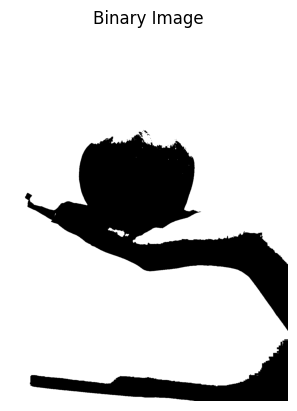

Region 1: Area = 1508782, Centroid = (579, 753), Perimeter = 6512, Circularity = 0.44710299027126965
Region 2: Area = 1, Centroid = (583, 432), Perimeter = 1, Circularity = 12.566370614359172
Region 3: Area = 1, Centroid = (568, 440), Perimeter = 1, Circularity = 12.566370614359172
Region 4: Area = 7, Centroid = (565, 442), Perimeter = 6, Circularity = 2.443460952792061
Region 5: Area = 4, Centroid = (550, 448), Perimeter = 4, Circularity = 3.141592653589793
Region 6: Area = 3, Centroid = (552, 451), Perimeter = 3, Circularity = 4.1887902047863905
Region 7: Area = 3, Centroid = (559, 454), Perimeter = 3, Circularity = 4.1887902047863905
Region 8: Area = 1, Centroid = (439, 461), Perimeter = 1, Circularity = 12.566370614359172
Region 9: Area = 5, Centroid = (534, 462), Perimeter = 5, Circularity = 2.5132741228718345
Region 10: Area = 11, Centroid = (414, 470), Perimeter = 10, Circularity = 1.382300767579509
Region 11: Area = 3, Centroid = (536, 470), Perimeter = 3, Circularity = 4.18879

In [8]:
# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis('off')
plt.show()

# Call the function and print properties
properties = compute_region_properties(binary_image)
for i, prop in enumerate(properties):
    print(f"Region {i + 1}: Area = {prop['area']}, Centroid = {prop['centroid']}, Perimeter = {prop['perimeter']}, Circularity = {prop['circularity']}")